# 3장 은행 텔레마케팅 데이터 분석

자료 출처: Hands-On Data Science for Marketing, Packt Publishing, 2019.

## 3.1 소개

이 장에서는 어떤 은행의 텔레마케팅 관련 데이터를 파이썬으로 분석한다. 여기에서 다룰 데이터는 포르투갈의 한 은행이 정기예금 텔레마케팅 행사를 하면서 기록한 각종 변수들로서 텔레마케팅 행사에 의해 고객이 정기예금에 가입했는지 여부가 초점이다. 분석 방법은 회귀분석 등 상대적으로 복잡한 통계적 모형을 사용하지 않고, 마케팅 활동의 성과를 평가하는 데 사용되는 핵심성과지표를 계산해보는 수준이다. 특히 텔레마케팅으로 어느 정도의 고객이 정기예금에 가입했는지, 즉 소위 전환율(conversion rate)을 계산하는 데 초점을 맞춘다. 전환율은 **디지털 마케팅 관련** 기본적인 **애널리틱스**(analytics)이다.(애널리틱스란 데이터 또는 통계의 체계적인 **계산적 분석**을 말한다.)

### ChatGPT Q&A

>**애널리틱스(analytics)에 대해 쉽게 설명해줘.**

---

>애널리틱스(Analytics)란 데이터를 수집, 분석, 해석하여 유용한 정보를 추출하고, 이를 바탕으로 의사결정을 지원하는 과정을 말합니다. 쉽게 말해, 다양한 데이터를 분석하여 사람들이 더 나은 결정을 내릴 수 있도록 도와주는 것입니다. 애널리틱스는 비즈니스, 과학, 의료, 금융, 교육 등 다양한 분야에서 사용됩니다.
>
>애널리틱스의 주요 과정은 다음과 같습니다:
>
>1. **데이터 수집**: 다양한 출처로부터 데이터를 모읍니다. 이 데이터는 판매 기록, 고객 설문, 웹사이트 트래픽 등이 될 수 있습니다.
>
>2. **데이터 정제**: 수집된 데이터는 종종 불완전하거나 오류를 포함하고 있을 수 있습니다. 데이터를 정제하는 과정에서는 이러한 오류를 수정하고, 누락된 값을 처리합니다.
>
>3. **데이터 분석**: 정제된 데이터를 사용하여 통계적 방법, 기계학습 알고리즘, 데이터 마이닝 기법 등을 적용해 유의미한 정보를 추출합니다.
>
>4. **인사이트 도출**: 분석을 통해 얻은 결과를 해석하여 비즈니스 의사결정, 고객 행동 이해, 시장 동향 예측 등에 활용할 수 있는 인사이트를 도출합니다.
>
>5. **결과 공유 및 의사결정 지원**: 분석 결과를 보고서, 대시보드 등의 형태로 정리하여 관련 이해관계자와 공유하고, 이를 바탕으로 전략 수립이나 의사결정을 지원합니다.
>
>애널리틱스는 조직이나 기업이 보다 데이터에 기반한, 객관적이고 효과적인 결정을 내리는 데 큰 도움을 줍니다. 예를 들어, 소매업체는 고객 구매 데이터를 분석하여 재고 관리를 최적화할 수 있고, 마케팅 팀은 고객 행동 데이터를 분석하여 타겟 마케팅 전략을 개발할 수 있습니다.

## 3.2 데이터

### 개요

여기에서 다룰 데이터는 포르투갈 한 은행의 정기예금 텔레마케팅과 관련된 것이다. 데이터의 원래 출처는 Moro 등이 수행한 2014년 연구논문(S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014)이다. 

이 연구는 은행의 정기예금 가입 텔레마케팅 성공 여부를 머신러닝 기법으로 접근한 것이다. 연구자들은 포르투갈의 한 은행에 대해 2008년부터 2013년까지 수집된 데이터를 사용했으며, 로지스틱 회귀(logistic regression), 결정 트리(decision trees), 신경망(neural network), 서포트 벡터 머신(SVM: support vector machine) 등 네 가지 모델을 비교했다. 

우리가 사용하는 "bank-additional-full.csv" 파일에는 Moro 등(2014) 연구의 데이터 파일에서 추출한 일부 관측들이 담겨 있다. 2008년 5월부터 2010년 11월까지 41,188개의 관측으로서 고객의 나이, 직업 등 20개 입력변수와 정기예금 가입 여부를 'yes'와 'no'로 기록한 출력변수 1개이다. 

### 변수 정보

(1) 은행 고객 데이터
- `age`: 나이(숫자)
- `job`: 직업의 종류(범주: admin., blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, unknown)
- `marital`: 혼인 여부(범주: divorced, married, single, unknown; 참고: "divorced"는 이혼 또는 사별을 의미함)
- `education`: 교육(범주: basic.4y, basic.6y, basic.9y, high.school, illiterate, professional.course, university.degree, unknown)
- `default`: 채무불이행 여부(범주: no, yes, unknown)
- `housing`: 주택 융자 여부(범주: no, yes, unknown)
- `loan`: 개인 대출 여부(범주: no, yes, unknown)

(2) 이번 텔레마케팅 행사의 마지막 컨택 관련
- `contact`: 콜 유형(범주: cellular, telephone)
- `month`: 컨택 월(범주: jan, feb, mar, ..., nov, dec)
- `day_of_week`: 컨택 요일(범주: mon, tue, wed, thu, fri)
- `duration`: 컨택 지속 시간(초)(숫자). **주의 사항**: 이 변수는 출력변수에 큰 영향을 미친다. 예를 들어 `duration`=0이면 `y`는 당연히 no이다. 또한 콜이 수행되기 전에는 `duration`을 알 수는 없지만, `duration`이 측정되는 시점(즉, 콜이 끝난 시점)에는 `y`값이 곧바로 드러난다. 따라서 이 변수는 예측변수로 사용돼서는 안되며, 벤치마크 목적으로만 포함되어야 한다.

(3) 기타 특성
- `campaign`: 이번 행사 동안 해당 고객에 대해 수행된 컨택 횟수(숫자, 마지막 컨택 포함)
- `pdays`: 이전 행사에서 해당 고객에게 마지막으로 연락한 후 경과한 날짜 수(숫자, 999는 고객에게 이전에 연락한 적이 없었음을 의미함)
- `previous`: 이번 행사 이전에 해당 고객에 대해 수행된 컨택 횟수(숫자)
- `poutcome`: 이전 마케팅 행사의 결과(범주: failure, nonexistent, success)

(4) 사회적, 경제적 관련 특성
- `emp.var.rate`: 고용 변동률 - 분기별 지표(숫자)
- `cons.price.idx`: 소비자 물가지수 - 월별 지표(숫자)
- `cons.conf.idx`: 소비자 신뢰지수 - 월별 지표(숫자)
- `euribor3m`: 유리보(EURIBOR) 3개월물 금리 - 일별 기록(숫자)
- `nr.Employee`: 직원 수 - 분기별 지표(숫자)

**출력 변수**

- `y`: 고객이 정기 예금에 가입했는지 여부(이항 변수: yes, no)

### 데이터 로딩

**라이브러리**

아래 첫 번째 줄은 그래프 등의 이미지를 자신의 웹 애플리케이션에 그리도록 `matplotlib`에 지시하는 것이다. 또한 `pandas`는 데이터 분석을 지원하며, `matplotlib`과 `seaborn`은 그래프 작성을 지원한다. 

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**데이터세트**

UCI Machine Learning Repository의 데이터 중 [Bank Marketing Data Set](https://archive.ics.uci.edu/dataset/222/bank+marketing)을 사용한다. 해당 웹페이지에 가서 오른쪽의 [DOWNLOAD](https://archive.ics.uci.edu/static/public/222/bank+marketing.zip) 링크를 클릭하여 데이터를 다운로드한 다음, 압축을 풀어 몇 단계의 폴더를 거쳐 들어가면 "bank-additional-full.csv" 파일을 발견할 수 있다. 이 파일을 자신의 컴퓨터의 적절한 폴더에 저장한 다음 아래와 같은 방식으로 로딩시킨다.(데이터 파일의 디렉토리를 적는 방법에 대해서는 2.2.1절의 ISLP "College.csv"를 불러들이는 방법을 참조할 것.)  

`pd.read_csv()` 함수의 옵션으로 `sep=';'`이 사용된다.(워드패드 등의 문서 앱으로 "bank-additional-full.csv" 파일을 열어보면 구분 기호로 쉼표(,)가 아니라 세미콜론(;)이 사용된 것을 알 수 있다.)

In [2]:
df = pd.read_csv('../Data/bank-additional-full.csv', sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## 3.3 핵심성과지표 계산

### 핵심성과지표
마케팅 활동의 성과를 평가하는 데 흔히 **핵심성과지표**(KPI: key performance indicators)가 사용된다. 성과지표는 수치화된 목표 또는 그 목표 달성과 관련된  정량화된 측정지표를 의미한다. "핵심"성과지표는 여러 성과지표 중 가장 중요한 것으로 선정한 것을 말한다. KPI 중 "디지털" 마케팅과 관련된 것으로는 CTR(클릭률), 전환율 등이 대표적이다. 

**CTR (Click Through Rate): 클릭률**

광고를 본 사람 중 클릭한 수가 얼마나 많은지의 비율, 즉 클릭수를 노출수로 나눈 것이다. 클릭률이 높을수록 광고가 올바른 대상에게 노출됐다고 판단할 수 있다.

**Conversion Rate: 전환율**

전환은 광고를 통해 사이트로 유입된 방문객이 광고주가 원하는 특정 행위를 취하는 것을 말한다. 여기에서 특정 행위는 가령 회원가입, 장바구니 담기, 제품 구매, 뉴스레터 가입, 소프트웨어 다운로드 등이 될 수 있다. 전환율은 유입수(number of leads)를 전환수(number of conversions)로 나눈 것이다. 

### 전환율 계산

우리의 텔레마케팅 데이터세트에서 "전환"은 예금가입을 의미한다. 데이터세트의 출력변수 `y`는 고객이 정기예금에 가입했는지를 yes 또는 no로 기록한 것이다. 우선 전환율 계산을 위해 이 변수를 yes는 1, no는 0으로 인코딩한다.

In [3]:
df['conversion'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,conversion
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


**총 고객수**

`pandas`에서 지원하는 `shape` 함수는 데이터 행과 열의 개수를 구하는 함수이다. 아래 결과를 보면 텔레마케팅 총 고객수는 41,188명이고, 변수는 22개이다.

In [4]:
df.shape

(41188, 22)

**총 전환 수**

전환자(즉, 예금에 가입한 고객)자가 총 몇명인지 알기 위해 앞에서 만든 `conversion` 변수의 합을 구한다. `conversion` 변수가 `df`라는 데이터프레임에 들어있기 때문에 `df.conversion` 또는 `df['conversion']`으로 표현해야 한다. 판다스의 `sum()` 메서드를 이용해 해당 변수의 합을 구할 수 있다.

In [5]:
df.conversion.sum()  # 또는 df['conversion'].sum()

4640

**전환율**

In [6]:
print('%i명 중 %i명이 전환' % (df.shape[0], df.conversion.sum()))
print('전환율: %0.2f%%' % (df.conversion.sum() / df.shape[0] * 100.0))

41188명 중 4640명이 전환
전환율: 11.27%


### 그룹별 전환율

위에서 계산한 것은 총(aggregate) 전환율인 반면, 고객을 여러 세그먼트로 분류하고 각 세그먼트 별로 전환율을 계산해보자. 이런 경우 `groupby` 함수가 유용하다.

**연령별 전환율 계산**

In [7]:
conversions_by_age = (df.groupby(by='age')['conversion'].sum() / 
                      df.groupby(by='age')['conversion'].count() * 100.0)

In [8]:
conversions_by_age

age
17     40.000000
18     42.857143
19     47.619048
20     35.384615
21     28.431373
         ...    
91      0.000000
92     75.000000
94      0.000000
95      0.000000
98    100.000000
Name: conversion, Length: 78, dtype: float64

**연령별 전환율 그래프**

그래프에서 한글이 깨지는 것을 막기 위해 아래 명령문을 실행한다.

In [9]:
import matplotlib
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
matplotlib.rcParams['axes.unicode_minus'] = False  # 축에 마이너스 부호 제대로 나오게 하기

위 코드는 Windows에 해당하는 것이고, MacBook의 경우에는 위 명령문 세 번째 줄을 다음과 같이 바꿔야 한다.
```
font_path = "/System/Library/Fonts/AppleSDGothicNeo.ttc"
```

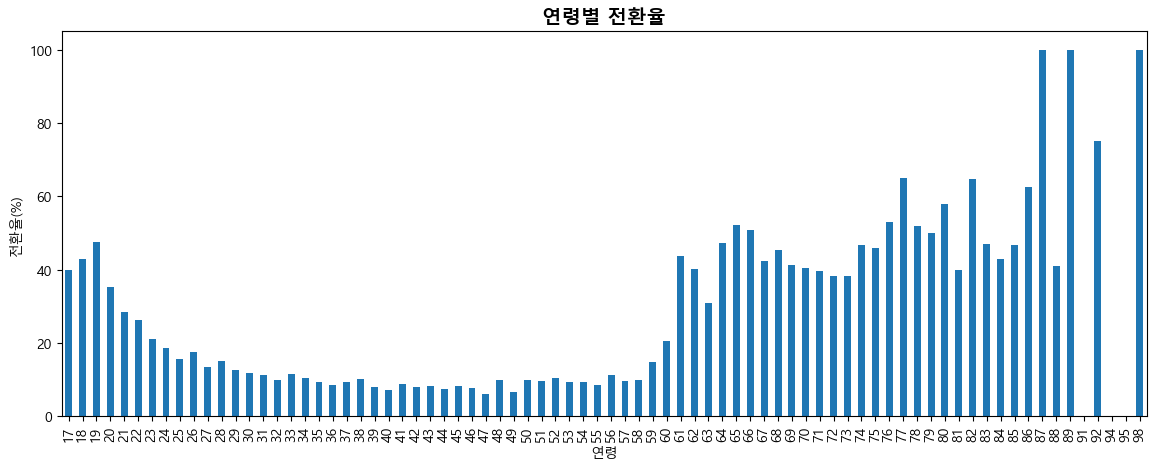

In [10]:
ax = conversions_by_age.plot(kind='bar', figsize=(14, 5))
plt.xlabel('연령')
plt.ylabel('전환율(%)')
plt.title('연령별 전환율', fontsize=14, fontweight='bold')
plt.show()

**연령대 그룹핑**

In [11]:
df['age_group'] = df['age'].apply(lambda x:
                                  '[17, 30)' if x < 30 else 
                                  '[30, 40)' if x < 40 else
                                  '[40, 50)' if x < 50 else
                                  '[50, 60)' if x < 60 else
                                  '[60, 70)' if x < 70 else
                                  '[70, 98]')

위 코딩에서 `lambda` 사용법은 아래 [부록](#부록:-lambda-사용법)에 몇 가지 사용 예시가 나와 있다.

**연령대별 전환율**

In [12]:
conversions_by_age_group = (df.groupby(by='age_group')['conversion'].sum() /
                            df.groupby(by='age_group')['conversion'].count() * 100.0)
conversions_by_age_group 

age_group
[17, 30)    16.263891
[30, 40)    10.125162
[40, 50)     7.923238
[50, 60)    10.157389
[60, 70)    34.668508
[70, 98]    47.121535
Name: conversion, dtype: float64

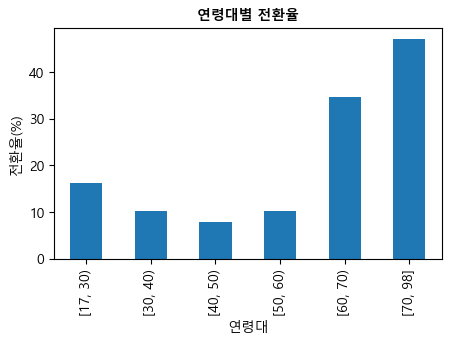

In [13]:
ax = conversions_by_age_group.loc[
    ['[17, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '[70, 98]']
].plot(kind='bar', figsize=(5,3))
plt.xlabel('연령대')
plt.ylabel('전환율(%)')
plt.title('연령대별 전환율', fontsize=10, fontweight='bold')
plt.show()

### 피벗 테이블

전환 그룹과 비전환 그룹의 인구통계적(demographic) 특징을 분석하는 것은 마케팅 전략 수립에 중요하다. 가령 전환 그룹과 비전환 그룹의 결혼 여부 분포를 비교해보자. 이런 식으로 만든 표를 **피벗 테이블**(pivot table)이라고 한다. 통계학에서는 **분할표**(contingency table)라고 부른다.

`pandas` 라이브러리의 `pivot_table` 함수를 사용한다. `df` 데이터프레임의 `y` 변수를 분류하는데, 행(index)은 `marital` 변수이고 열(column)은 `conversion` 변수이다. `aggfunc=` 파라미터를 사용하여 집계 유형을 정할 수 있는데, 여기에서는 `len` 함수를 사용하여 각 그룹의 개체(고객) 수를 count한다. 이렇게 해서 만들어진 `pd.pivot_table`은 하나의 새로운 데이터프레임이 된다. 

In [14]:
pd.pivot_table(df, values='y', index='marital', columns='conversion', aggfunc=len)

conversion,0,1
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


똑같은 피벗 테이블을 `groupby` 함수를 사용해서 아래와 같이 만들 수도 있다. 아래 명령문은 `marital`과 `conversion`의 각 그룹에 몇명이 속해 있는지를 (`conversion` 관측 개수를 통해) 구한 다음에 `conversion` 그룹에 대해서는 stack 하지 않는 방식으로(즉, `conversion` 그룹을 column으로) 표현하라는 것이다. 아래 표에서 가령 싱글이면서 예금에 가입한 사람은 1,620명이다.

In [15]:
df.groupby(['marital','conversion'])['conversion'].count().unstack('conversion')

conversion,0,1
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


**결혼유형별 전환율 계산**

위 표는 `marital`과 `conversion`의 각 그룹별로 관측 숫자를 구한 것이고, 이것을 비율로 바꾼 것이 아래 나와 있다. 이때 분모를 무엇으로 하는냐가 문제인데, 여기에서는 각 결혼유형별 총 관측 숫자를 분모로 삼았다. 따라서 아래 표의 숫자는 각 결혼유형별 비전환율(`conversion=0`) 및 전환율(`conversion=1`)이다. 아래 결과를 보면, 싱글 그룹에서는 전환율이 14.0%로서 이혼 그룹(10.3%) 및 결혼 그룹(10.2%)의 전환율보다 더 높은 것을 알 수 있다. 

In [16]:
marital_conversion_df = pd.pivot_table(df, values='y', index='marital', 
    columns='conversion', aggfunc=len)  # 위에서 만든 피벗 테이블
marital_conversion_df = marital_conversion_df.divide(
    df.groupby(by='marital')['conversion'].count(), axis=0)*100.0
marital_conversion_df

conversion,0,1
marital,,
divorced,89.679098,10.320902
married,89.842747,10.157253
single,85.995851,14.004149
unknown,85.000000,15.000000


**연령대별 & 결혼유형별 피벗 테이블**

앞에서는 결혼유형이라는 단일 범주를 기준으로 전환율을 계산했는데, 이번에는 연령대 및 결혼유형의 2개 범주를 기준으로 전환율을 계산해보자. 우선 아래 명령문은 `age_group`과 `marital`의 각 그룹에 전환자가 몇명 속해 있는지를 (`conversion` 관측값의 합을 통해) 구한 다음에 `marital` 그룹에 대해서는 stack 하지 않는 방식으로(즉 `marital` 그룹을 column으로) 표현하라는 것이다. 아래 표에서 가령 싱글이면서 30대 중 예금에 가입한 전환자는 684명이다.

In [17]:
age_marital_df = df.groupby(['age_group', 'marital'])\
['conversion'].sum().unstack('marital').fillna(0)
age_marital_df

marital,divorced,married,single,unknown
age_group,,,,
"[17, 30)",12.0,158.0,751.0,1.0
"[30, 40)",128.0,897.0,684.0,6.0
"[40, 50)",126.0,575.0,130.0,3.0
"[50, 60)",119.0,533.0,44.0,1.0
"[60, 70)",27.0,218.0,5.0,1.0
"[70, 98]",64.0,151.0,6.0,0.0


**연령대별 & 결혼유형별 전환율 계산**

위 표는 `age_group`과 `marital`의 각 그룹별로 전환자 숫자를 구한 것이고, 이것을 전환율로 바꾼 것이 아래 나와 있다. 이때 분모를 무엇으로 하는냐가 문제인데, 여기에서는 각 결혼유형별 총 관측수를 분모로 삼았다. 따라서 아래 표의 숫자는 각 결혼유형별 전환율인 셈이다. 

In [18]:
age_marital_df = age_marital_df.divide(
    df.groupby(by='age_group')['conversion'].count(), axis=0)*100.0
age_marital_df

marital,divorced,married,single,unknown
age_group,,,,
"[17, 30)",0.211678,2.787088,13.247486,0.017640
"[30, 40)",0.755697,5.295785,4.038257,0.035423
"[40, 50)",1.197036,5.462664,1.235037,0.028501
"[50, 60)",1.734188,7.767415,0.641212,0.014573
"[60, 70)",3.729282,30.110497,0.690608,0.138122
"[70, 98]",13.646055,32.196162,1.279318,0.000000


**전환율 막대그래프(1)**

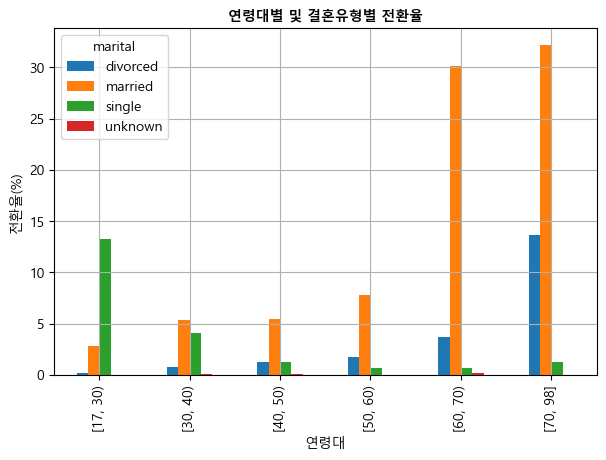

In [19]:
ax = age_marital_df.loc[
    ['[17, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '[70, 98]']
].plot(kind='bar', grid=True, figsize=(7,4.5))
plt.xlabel('연령대')
plt.ylabel('전환율(%)')
plt.title('연령대별 및 결혼유형별 전환율', fontsize=10, fontweight='bold')
plt.show()

**전환율 막대그래프(2)**

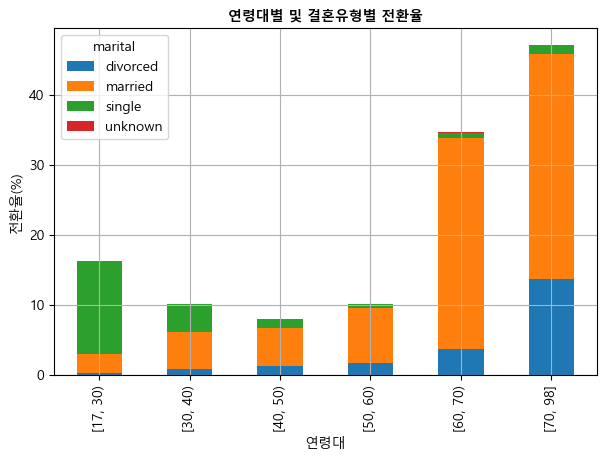

In [20]:
ax = age_marital_df.loc[
    ['[17, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '[70, 98]']
].plot(kind='bar', stacked=True, grid=True, figsize=(7,4.5))
plt.xlabel('연령대')
plt.ylabel('전환율(%)')
plt.title('연령대별 및 결혼유형별 전환율', fontsize=10, fontweight='bold')
plt.show()

## 부록: lambda 사용법

In [21]:
# lambda 문장 자체를 함수로 사용하는 경우
(lambda n,m: n+m)(2,3)

5

In [22]:
# lambda를 변수에 할당하여 재사용하는 경우
x = lambda a: a + 10
x(5)

15

In [23]:
# lambda 식 안에서 조건문 사용 가능
(lambda n,m: n if n%2==0 else m)(1,3)

3

### ChatGPT Q&A

>**파이썬에서 lambda 사용법의 간단한 예를 하나 알려줘.**

---

>파이썬에서 `lambda` 함수는 작은 익명 함수를 정의할 때 사용합니다. `lambda` 함수는 여러 개의 인자를 받을 수 있지만, 표현식은 하나만 가집니다. 여기 간단한 예시가 있습니다:
>
>     add = lambda x, y: x + y  
>     result = add(5, 3)  
>     print(result)  # 출력: 8
>
>>
>이 예시에서 `lambda x, y: x + y`는 두 개의 인자 `x`와 `y`를 받아서 더한 값을 반환하는 익명 함수를 생성합니다. 이 함수를 `add`라는 변수에 할당하고, `add(5, 3)`을 호출하여 `x`에 `5`, `y`에 `3`을 전달한 결과를 출력합니다. 결과는 두 숫자의 합인 `8`입니다.
>
>`lambda` 함수는 간단한 함수가 필요할 때, 다른 함수의 인자로 함수를 전달할 때 유용하게 사용됩니다. 예를 들어, 리스트의 요소를 정렬할 때 정렬 기준으로 사용되는 함수를 `lambda`로 간단하게 정의할 수 있습니다.